# Getting Data*

In [230]:
!pip3 install spotipy
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [231]:
cid = '5ced615fe1ba487ca598f582c32df70a'
secret = '20d814b9aee64ca09585713ab3cf3577'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [206]:
audio_features_list = [ "danceability","energy","loudness", "speechiness","instrumentalness","valence","tempo","acousticness"]
#audio_analysis_list = ["mode"]
features = audio_features_list

In [207]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    tracks = [track['track']['id'] for track in tracks if track['track']]
    return tracks

In [208]:
def call_playlist(creator, playlist_id):
    
    playlist_df = pd.DataFrame(columns = features)
    track_ids = get_playlist_tracks(creator, playlist_id)
    
    for track_id in track_ids:

        track_features = dict()
        audio_features = sp.audio_features(track_id)[0]
        if audio_features:
          for feature in audio_features_list:  track_features[feature] = audio_features[feature]

        #audio_analysis = sp.audio_analysis(track_id)['track']
        #for feature in audio_analysis_list:  track_features[feature] = audio_analysis[feature]
        
          track_df = pd.DataFrame(track_features, index = [0])
          playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [6]:
happy1 = call_playlist(creator = "", playlist_id = '37i9dQZF1DXdPec7aLTmlC') #happy hits - spotify
happy2 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWZKuerrwoAGz') #happy favorites - spotify
happy3 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWSf2RDTDayIx') #happy beats - spotify
happy4 = call_playlist(creator = "", playlist_id = '37i9dQZF1DXcNb6Ba0LuVc') #feel good beats - spotify
happy5 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWVlYsZJXqdym') 
happy6 = call_playlist("Morning Motivation", "37i9dQZF1DXc5e2bJhV6pu")
happy7 = call_playlist("","37i9dQZF1DX0E9XMGembJo")
happy8 = call_playlist("", "37i9dQZF1DX2sUQwD7tbmL")
happy9 = call_playlist("", "37i9dQZF1DX5YTAi6JhwZm")
happy10 = call_playlist("","37i9dQZF1DX0tnKPLNG9Ld")


happy_playlist_data = pd.concat([happy1, happy2, happy3, happy4, happy5, happy6, happy7, happy8, happy9, happy10])


In [7]:
sad1 = call_playlist("sadhour", '37i9dQZF1DWSqBruwoIXkA')
sad2 = call_playlist("sadsongs", '37i9dQZF1DX7qK8ma5wgG1')
sad3 = call_playlist("sadbops", '37i9dQZF1DWZUAeYvs88zc')
sad4 = call_playlist("sadbeats", '37i9dQZF1DWVrtsSlLKzro')
sad5 = call_playlist("", "37i9dQZF1DWYfVqUciU2jI")
sad6 = call_playlist("", "7xySbQAypJdiEBRRlycJIY")
sad_playlist_data = pd.concat([sad1,sad2,sad3,sad4,sad5, sad6])


In [8]:
party1 = call_playlist("", '37i9dQZF1DWY4xHQp97fN6')
party2 = call_playlist("", '37i9dQZF1DX6GwdWRQMQpq')
party3 = call_playlist("", '37i9dQZF1DX66m4icL86Ru')
party4 = call_playlist("", '37i9dQZF1DXa2PvUpywmrr')
party5 = call_playlist("", '37i9dQZF1DX0MXH7aN4Pxn')
party6 = call_playlist("Dance Party", "37i9dQZF1DXaXB8fQg7xif")
party7 = call_playlist("Choice Edit", "37i9dQZF1DX1aTyQ3Z9nTc")
party8 = call_playlist("Floorfillers", "37i9dQZF1DWWXrKtH3fzUd")
party9 = call_playlist("Limo Ride", "37i9dQZF1DX5AX8gioxrnN")
party10 = call_playlist("Warehouse Party", "37i9dQZF1DX5hHfOi73rY3")
party11 = call_playlist("", "37i9dQZF1DX7e8TjkFNKWH")
party12 = call_playlist("", "37i9dQZF1DX4nkDUiMktkK")
party13 = call_playlist("", "37i9dQZF1DXbX3zSzB4MO0")
party_playlist_data = pd.concat([party1, party2, party3, party4, party5, party6, party7, party8, party9, party10, party11, party12, party13])

In [9]:
chill1 = call_playlist(creator = "",playlist_id = '6IKQrtMc4c00YzONcUt7QH')
chill2 = call_playlist(creator = "", playlist_id='37i9dQZF1DX6VdMW310YC7')
chill3 = call_playlist(creator = "", playlist_id ='37i9dQZF1DXdLK5wjKyhVm')
chill4 = call_playlist(creator = "", playlist_id ='37i9dQZF1DX2UgsUIg75Vg')
chill5 = call_playlist("Boistrous Pop", '6QAVsGp118XZLQrBe38r5O')
chill6 = call_playlist("Lowkey", "37i9dQZF1DX2yvmlOdMYzV")
chill7 = call_playlist("Unplugged", "37i9dQZF1DWWxrt1tiKYiX")
chill8 = call_playlist("Stay in Bed", "37i9dQZF1DX6tTW0xDxScH")
chill9 = call_playlist("Just Chill", "37i9dQZF1DX889U0CL85jj")
chill10 = call_playlist("Sunset Chill", "37i9dQZF1DWVtzubo4lvxd")

chill_playlist_data = pd.concat([chill1, chill2, chill3, chill4, chill5, chill6, chill7, chill8, chill9, chill10])


In [10]:
chill_playlist_data.to_csv(path_or_buf='/chill_data')
happy_playlist_data.to_csv(path_or_buf='/happy_data')
party_playlist_data.to_csv(path_or_buf='/party_data')
sad_playlist_data.to_csv(path_or_buf='/sad_data')

In [11]:
def normalize(playlist_df):
    max_df = pd.Series()
    min_df = pd.Series()
    normalized_df = playlist_df.copy()
    for feature_name in playlist_df.columns:
        max_df[feature_name] = playlist_df[feature_name].max()
        min_df[feature_name] = playlist_df[feature_name].min()
        normalized_df[feature_name] = (playlist_df[feature_name] - min_df[feature_name]) / (max_df[feature_name] - min_df[feature_name])
    return normalized_df, max_df, min_df

def denormalize(norm_df, max_df, min_df):
  denormalized_df = norm_df.copy()
  for feature_name in norm_df.columns:
    denormalized_df[feature_name] = (norm_df[feature_name] * (max_df[feature_name]-min_df[feature_name]) + min_df[feature_name])
  return denormalized_df

In [12]:
chill_playlist_data = normalize(chill_playlist_data)[0].sample(n=1000, replace=False)
happy_playlist_data = normalize(happy_playlist_data)[0].sample(n=1000, replace=False)
sad_playlist_data = normalize(sad_playlist_data)[0].sample(n=1000, replace=False)
party_playlist_data = normalize(party_playlist_data)[0].sample(n=1000, replace=False)
# print(len(chill_playlist_data), len(happy_playlist_data), len(sad_playlist_data), len(party_playlist_data))

<ipython-input-11-7deacf3c2c32>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  max_df = pd.Series()
<ipython-input-11-7deacf3c2c32>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  min_df = pd.Series()


# Dimentionality Reduction*

In [14]:
from matplotlib import pyplot as plt


class PCA(object):
    def __init__(self):
        self.U = None
        self.S = None
        self.V = None

    def fit(self, X: np.ndarray) -> None:  # 5 points
        X = X - np.mean(X, axis = 0)
        self.U, self.S, self.V = np.linalg.svd(X, full_matrices= False)

    def transform(self, data: np.ndarray, K: int = 2) -> np.ndarray:  # 2 pts
        centered_data = data - data.mean(axis = 0)
        V = self.V.T[:, :K]
        X_new = np.matmul(centered_data,V)
        return X_new

    def transform_rv(
        self, data: np.ndarray, retained_variance: float = 0.99
    ) -> np.ndarray:  # 3 pts
        var_retained = np.cumsum(np.square(self.S))/np.sum(np.square(self.S))        
        K = np.argmax(var_retained >= retained_variance)
        X_new = self.transform(data, K+1)
        return X_new

    def get_V(self) -> np.ndarray:

        return self.V

    def visualize(self, X: np.ndarray, y: np.ndarray, fig=None) -> None:  # 5 pts
        ax = fig.add_subplot(111, projection='3d')
        
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        ax.set_title("PCA")

        self.fit(X)
        names = ["Chill", "Happy", "Sad", "Party"]
        x_proj = self.transform(X, K = 3)

        for i in range(4):
            inds = (y == i).nonzero()
            points = x_proj[inds]
            xs = [x[0] for x in points]
            ys = [x[1] for x in points]
            zs =  [x[2] for x in points]
            if ys:
                ax.plot(xs, ys, zs,'.', label = names[i])
        plt.legend()
        plt.show()


In [15]:
def pca_on_df(playlist_data, features):
    playlist_to_numpy = playlist_data.to_numpy(dtype = 'float64')

    reduce_dims = PCA()
    reduce_dims.fit(playlist_to_numpy)

    pc = reduce_dims.get_V()[:4,:]
    pc_df = pd.DataFrame(pc, columns = features,index = ["PC1","PC2","PC3","PC4"]).T
    
    
    print("Top four principal components:")
    display(pc_df)

    print("Top four principal components, but zero out all values that are close to zero:")
    display(pd.DataFrame(np.where(abs(pc_df) <= 0.1, 0, pc_df), columns = ["PC1","PC2","PC3","PC4"]))

    print("\nS matrix of PCA")
    display(pd.DataFrame(reduce_dims.S, columns = ["Score"]))

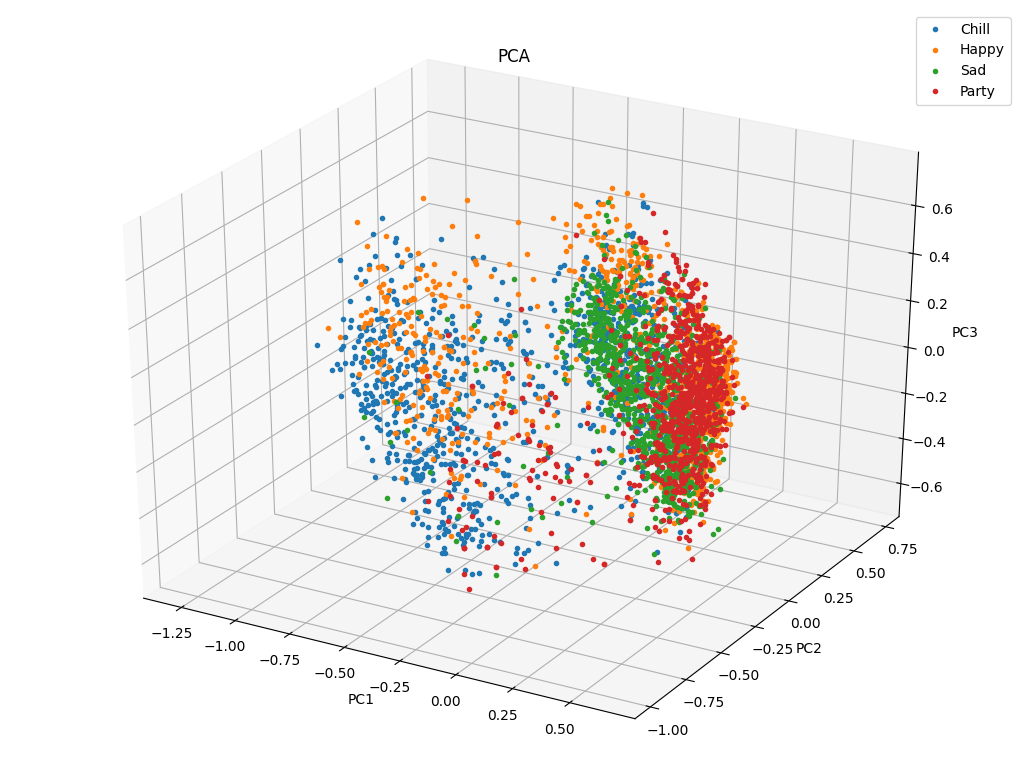

In [16]:
chill = [0] * 1000
happies = [1] * 1000
sad = [2] * 1000
party = [3] * 1000

labels = chill + happies + sad + party 
labels = np.array(labels)

fig = plt.figure(figsize=(13, 10), dpi=100)


cols = ['tempo','danceability','loudness', 'energy', 'speechiness', 'instrumentalness','valence', 'acousticness']
all = pd.concat([chill_playlist_data, happy_playlist_data, sad_playlist_data, party_playlist_data])
allnp = all.to_numpy(dtype = "float64")
PCA().visualize(allnp, labels, fig)

In [17]:
pca_on_df(all, cols)

Top four principal components:


,PC1,PC2,PC3,PC4
tempo,0.038589,-0.155103,0.258264,-0.574485
danceability,0.406512,-0.273681,-0.073564,0.480561
loudness,0.194234,-0.020084,-0.062167,0.295560
energy,0.047445,0.013192,0.080749,-0.287434
speechiness,-0.563470,-0.812375,-0.001583,0.094434
instrumentalness,0.285082,-0.167406,0.883203,0.159662
valence,0.032412,-0.018040,-0.116823,0.333971
acousticness,-0.627264,0.460610,0.351860,0.350867


Top four principal components, but zero out all values that are close to zero:


,PC1,PC2,PC3,PC4
0,0.000000,-0.155103,0.258264,-0.574485
1,0.406512,-0.273681,0.000000,0.480561
2,0.194234,0.000000,0.000000,0.295560
3,0.000000,0.000000,0.000000,-0.287434
4,-0.563470,-0.812375,0.000000,0.000000
5,0.285082,-0.167406,0.883203,0.159662
6,0.000000,0.000000,-0.116823,0.333971
7,-0.627264,0.460610,0.351860,0.350867



S matrix of PCA


,Score
0,25.458240
1,18.849429
2,15.879751
3,11.113031
4,10.582599
5,9.268347
6,8.797556
7,5.783432


In [18]:
pca = PCA()
chill = chill_playlist_data.to_numpy(dtype = "float64")
print(chill.shape)
pca.fit(chill)
chill_pca = pca.transform_rv(chill, .92)
chill_pca = pd.DataFrame(chill_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])
print(chill_pca.shape)

pca = PCA()
happy = happy_playlist_data.to_numpy(dtype = "float64")
print(happy.shape)
pca.fit(happy)
happy_pca = pca.transform_rv(happy, .92)
happy_pca = pd.DataFrame(happy_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])
print(happy_pca.shape)

pca = PCA()
sad = sad_playlist_data.to_numpy(dtype = "float64")
print(sad.shape)
pca.fit(sad)
sad_pca = pca.transform_rv(sad, .92)
sad_pca = pd.DataFrame(sad_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])
print(sad_pca.shape)
 
pca = PCA()
party = party_playlist_data.to_numpy(dtype = "float64")
print(party.shape)
pca.fit(party)
party_pca = pca.transform_rv(party, .91)
party_pca = pd.DataFrame(party_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])
print(party_pca.shape)

(1000, 8)
(1000, 6)
(1000, 8)
(1000, 6)
(1000, 8)
(1000, 6)
(1000, 8)
(1000, 6)


# Create dataset*

Create a Pytorch Dataset class, which we use to do operations with our playlist's dataframe. 
Define the getitem method, which converts a specified row (song) of the playlist into a Pytorch Tensor. 

In [19]:
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.utils.data import Dataset
from torch.optim import Adagrad

In [20]:
class PlaylistData(Dataset):
    
    def __init__(self, data): self.data = data

    def __len__(self):  return len(self.data)
    
    def num_features(self): return len(self.data.columns)
    
    def __getitem__(self, index):
        song_at_index = self.data.iloc[index]
        song_tensor = torch.Tensor(song_at_index)
        return song_tensor

# Model*



In [21]:
class PlaylistLearner(nn.Module):
    def __init__(self, num_songs, num_features):
        super(PlaylistLearner, self).__init__()
        self.seq = nn.Sequential(   nn.Linear(num_songs*num_features, num_songs*num_features, bias = True),
                                    nn.ReLU(),
                                    nn.Linear(num_songs*num_features,num_features, bias = True),
                                 )
        
    def forward(self, song_collection):
      input = song_collection.flatten()
      out = self.seq(input)
      return out

In [96]:
class PlaylistRNN(nn.Module):
  def __init__(self, num_input_songs, num_predicted_songs, num_features):
    super(PlaylistRNN, self).__init__()
    self.rnn = nn.LSTM(input_size = num_input_songs, hidden_size = num_predicted_songs)
    self.linear = nn.Linear(in_features = num_features, out_features = num_features)

  def forward(self, input):
    output, (hidden, cell) = self.rnn(input)
    output = output.transpose(0,1)
    fc = self.linear(output)

    return fc


# Tag Class*
Gotta deal with special cases: mode and time signature require the mean values to be rounded


In [23]:
class Tag:
  def __init__(self, playlist_dataset, num_input_songs ,num_output_songs, num_sub_batches):
   
    self.num_input_songs, self.num_output_songs = num_input_songs, num_output_songs
    self.batch_size = num_input_songs + num_output_songs
    self.num_sub_batches = num_sub_batches
     
    self.train_data, self.val_data = self.split_dataset(dataset_to_split = playlist_dataset.sample(frac=1, random_state=42).reset_index(drop=True))
    self.train_iterator, self.val_iterator = self.create_iterator(self.train_data), self.create_iterator(self.val_data)
  
  def split_dataset(self, dataset_to_split, props = [0.75, 0.25]):
    size = dataset_to_split.shape[0]
    split= int (size*props[0])
    train_df, val_df= PlaylistData(dataset_to_split.iloc[:split]), PlaylistData(dataset_to_split.iloc[split:])
    return train_df, val_df

  def create_iterator(self, dataset):
    
    batch_size = self.num_input_songs + self.num_output_songs
    num_samples = (len(dataset) // batch_size) * batch_size
    sampler = RandomSampler(dataset, replacement = False, num_samples = num_samples)
    
    subs = self.num_sub_batches
    num_input_songs = self.num_input_songs
    
    def collate_fn(batch):
      x_collection = []
      y_collection = []
      for i in range(subs):
        
        x_collection.append(torch.stack(batch[:num_input_songs]).to(device))
        y_collection.append(torch.mean(torch.stack(batch[num_input_songs:]), 0).to(device))
        random.shuffle(batch)

      return x_collection,y_collection
    

    iterator = DataLoader(dataset = dataset
                          ,sampler = sampler
                          ,batch_size = batch_size
                          ,collate_fn = collate_fn)
    return iterator
  
  #number of predictions we eventually get from this dataset
  def get_num_expected_predictions(self): return self.train_data.__len__() * self.num_sub_batches / (self.batch_size)

  def get_num_features(self): return self.train_data.num_features()


In [47]:
class Tag_RNN:
  def __init__(self, playlist_dataset, num_input_songs ,num_output_songs, num_sub_batches):
   
    self.num_input_songs, self.num_output_songs = num_input_songs, num_output_songs
    self.batch_size = num_input_songs + num_output_songs
    self.num_sub_batches = num_sub_batches
     
    self.train_data, self.val_data = self.split_dataset(dataset_to_split = playlist_dataset.sample(frac=1, random_state=42).reset_index(drop=True))
    self.train_iterator, self.val_iterator = self.create_iterator(self.train_data), self.create_iterator(self.val_data)
  
  def split_dataset(self, dataset_to_split, props = [0.75, 0.25]):
    size = dataset_to_split.shape[0]
    split= int (size*props[0])
    train_df, val_df= PlaylistData(dataset_to_split.iloc[:split]), PlaylistData(dataset_to_split.iloc[split:])
    return train_df, val_df

  def create_iterator(self, dataset):
    
    batch_size = self.num_input_songs + self.num_output_songs
    num_samples = (len(dataset) // batch_size) * batch_size
    sampler = RandomSampler(dataset, replacement = False, num_samples = num_samples)
    
    subs = self.num_sub_batches
    num_input_songs = self.num_input_songs
    
    def collate_fn(batch):
      x = torch.stack(batch[:num_input_songs]).to(device)
      y = torch.stack(batch[num_input_songs:]).to(device)

      return x,y
    

    iterator = DataLoader(dataset = dataset
                          ,sampler = sampler
                          ,batch_size = batch_size
                          ,collate_fn = collate_fn)
    return iterator
  
  #number of predictions we eventually get from this dataset
  def get_num_expected_predictions(self): return self.train_data.__len__() * self.num_sub_batches / (self.batch_size)

  def get_num_features(self): return self.train_data.num_features()

In [48]:
class TagModel():
  def __init__(self, tagdata, epochs, lr):
    self.tagdata = tagdata
    
    
    self.model = PlaylistLearner(self.tagdata.num_input_songs, self.tagdata.get_num_features()).to(device)
    self.loss_function = nn.MSELoss()
    self.optimizer = Adagrad(self.model.parameters(), lr = lr)
    self.epochs = epochs

  
    self.train_losses = []
    self.val_losses = []

  def learn(self):

    for epoch in range(self.epochs): 
      self.model.train()
      train_loss = 0
      train_examples = 0

      for x_collection,y_collection in self.tagdata.train_iterator:
        for input, output in zip(x_collection, y_collection): 
          
          self.optimizer.zero_grad()
          pred = self.model(input)
          actual = output
          loss = self.loss_function(pred, actual)
          loss.backward()
          self.optimizer.step()

          train_loss += loss.item()
          train_examples += 1
          
      avg_train_loss = train_loss / train_examples
      avg_val_loss = self.eval()
      
      self.train_losses.append(avg_train_loss)
      self.val_losses.append(avg_val_loss)

      
      if epoch%50 == 0: 
        print("Epoch: {}/{}\t Avg  Train Loss: {:.4f}\t Avg  Val Loss: {:.4f}".format(epoch, self.epochs, avg_train_loss,avg_val_loss))
    
  def eval(self):
    n = 0
    loss = 0
    for x_collection,y_collection in self.tagdata.val_iterator:
        for input, output in zip(x_collection, y_collection): 
          
          pred = self.model(input)
          loss += self.loss_function(pred, output)
          n += 1
    return loss / n
    



In [49]:
class TagModelRNN():
  def __init__(self, tagdata, epochs, lr):
    self.tagdata = tagdata

    self.model = PlaylistRNN(self.tagdata.num_input_songs, self.tagdata.num_output_songs, self.tagdata.get_num_features()).to(device)
    self.loss_function = nn.MSELoss()
    self.optimizer = Adagrad(self.model.parameters(), lr = lr)
    self.epochs = epochs

  
    self.train_losses = []
    self.val_losses = []

  def learn(self):

    for epoch in range(self.epochs): 
      self.model.train()
      train_loss = 0
      train_examples = 0

      for x,y in self.tagdata.train_iterator:

          self.optimizer.zero_grad()
          pred = self.model(x.T)
          loss = self.loss_function(pred, y)
          loss.backward()
          self.optimizer.step()

          train_loss += loss.item()
          train_examples += 1
          
      avg_train_loss = train_loss / train_examples
      avg_val_loss = self.eval()
      
      self.train_losses.append(avg_train_loss)
      self.val_losses.append(avg_val_loss)

      
      if epoch%50 == 0: 
        print("Epoch: {}/{}\t Avg  Train Loss: {:.4f}\t Avg  Val Loss: {:.4f}".format(epoch, self.epochs, avg_train_loss,avg_val_loss))
    
  def eval(self):
    n = 0
    loss = 0
    for x,y in self.tagdata.val_iterator:
      pred = self.model(x.T)
      loss += self.loss_function(pred, y)
      n += 1
    return loss / n
    


# Training Models

In [50]:
tag_stuff = {
    "chill" : {
        'data' : chill_playlist_data,
        'pca_data': chill_pca
    },
    "happy" : {
        'data' : happy_playlist_data,
        'pca_data': happy_pca
    },
    "sad" : {
        'data' : sad_playlist_data,
        'pca_data': sad_pca
    },
    "party" : {
        'data' : party_playlist_data,
        'pca_data': party_pca
    }
}


In [62]:
for tag_name, properties in tag_stuff.items():
  properties['NNiterators'] = Tag(properties['data'], num_input_songs = 4, num_output_songs = 6, num_sub_batches = 3)
  properties['NN'] = TagModel(properties['NNiterators'], 200, 0.0005)
  print('Training NN for tag: ', tag_name)
  properties['NN'].learn()



Training NN for tag:  chill
Epoch: 0/200	 Avg  Train Loss: 0.2482	 Avg  Val Loss: 0.2059
Epoch: 50/200	 Avg  Train Loss: 0.0123	 Avg  Val Loss: 0.0126
Epoch: 100/200	 Avg  Train Loss: 0.0135	 Avg  Val Loss: 0.0118
Epoch: 150/200	 Avg  Train Loss: 0.0114	 Avg  Val Loss: 0.0121
Training NN for tag:  happy
Epoch: 0/200	 Avg  Train Loss: 0.2154	 Avg  Val Loss: 0.1872
Epoch: 50/200	 Avg  Train Loss: 0.0118	 Avg  Val Loss: 0.0113
Epoch: 100/200	 Avg  Train Loss: 0.0110	 Avg  Val Loss: 0.0124
Epoch: 150/200	 Avg  Train Loss: 0.0102	 Avg  Val Loss: 0.0107
Training NN for tag:  sad
Epoch: 0/200	 Avg  Train Loss: 0.1456	 Avg  Val Loss: 0.1066
Epoch: 50/200	 Avg  Train Loss: 0.0097	 Avg  Val Loss: 0.0100
Epoch: 100/200	 Avg  Train Loss: 0.0085	 Avg  Val Loss: 0.0082
Epoch: 150/200	 Avg  Train Loss: 0.0085	 Avg  Val Loss: 0.0083
Training NN for tag:  party
Epoch: 0/200	 Avg  Train Loss: 0.1961	 Avg  Val Loss: 0.1692
Epoch: 50/200	 Avg  Train Loss: 0.0082	 Avg  Val Loss: 0.0082
Epoch: 100/200	 Avg 

In [61]:
for tag_name, properties in tag_stuff.items():
  properties['NNiterator_PCA'] = Tag(properties['pca_data'], num_input_songs = 4, num_output_songs = 6, num_sub_batches = 2)
  properties['NN_PCA'] = TagModel(properties['NNiterator_PCA'], 200, 0.0005)
  print('Training NN for tag: ', tag_name," Using PC's as features")
  properties['NN_PCA'].learn()


Training NN for tag:  chill  Using PC's as features
Epoch: 0/200	 Avg  Train Loss: 0.0248	 Avg  Val Loss: 0.0221
Epoch: 50/200	 Avg  Train Loss: 0.0169	 Avg  Val Loss: 0.0117
Epoch: 100/200	 Avg  Train Loss: 0.0147	 Avg  Val Loss: 0.0144
Epoch: 150/200	 Avg  Train Loss: 0.0134	 Avg  Val Loss: 0.0142
Training NN for tag:  happy  Using PC's as features
Epoch: 0/200	 Avg  Train Loss: 0.0230	 Avg  Val Loss: 0.0240
Epoch: 50/200	 Avg  Train Loss: 0.0148	 Avg  Val Loss: 0.0150
Epoch: 100/200	 Avg  Train Loss: 0.0120	 Avg  Val Loss: 0.0115
Epoch: 150/200	 Avg  Train Loss: 0.0113	 Avg  Val Loss: 0.0140
Training NN for tag:  sad  Using PC's as features
Epoch: 0/200	 Avg  Train Loss: 0.0340	 Avg  Val Loss: 0.0272
Epoch: 50/200	 Avg  Train Loss: 0.0106	 Avg  Val Loss: 0.0103
Epoch: 100/200	 Avg  Train Loss: 0.0094	 Avg  Val Loss: 0.0088
Epoch: 150/200	 Avg  Train Loss: 0.0085	 Avg  Val Loss: 0.0070
Training NN for tag:  party  Using PC's as features
Epoch: 0/200	 Avg  Train Loss: 0.0277	 Avg  Val

In [57]:
for tag_name, properties in tag_stuff.items():
  properties['RNN_iterator'] = Tag_RNN(properties['data'], num_input_songs = 4, num_output_songs = 6, num_sub_batches = 2)
  properties['RNN'] = TagModelRNN(properties['RNN_iterator'], 1000, 0.0005)
  print('Training RNN for tag: ', tag_name)
  properties['RNN'].learn()

Training RNN for tag:  chill
Epoch: 0/1000	 Avg  Train Loss: 0.2950	 Avg  Val Loss: 0.2856
Epoch: 50/1000	 Avg  Train Loss: 0.2252	 Avg  Val Loss: 0.2265
Epoch: 100/1000	 Avg  Train Loss: 0.1857	 Avg  Val Loss: 0.1874
Epoch: 150/1000	 Avg  Train Loss: 0.1513	 Avg  Val Loss: 0.1517
Epoch: 200/1000	 Avg  Train Loss: 0.1223	 Avg  Val Loss: 0.1233
Epoch: 250/1000	 Avg  Train Loss: 0.1024	 Avg  Val Loss: 0.0980
Epoch: 300/1000	 Avg  Train Loss: 0.0893	 Avg  Val Loss: 0.0907
Epoch: 350/1000	 Avg  Train Loss: 0.0781	 Avg  Val Loss: 0.0838
Epoch: 400/1000	 Avg  Train Loss: 0.0727	 Avg  Val Loss: 0.0709
Epoch: 450/1000	 Avg  Train Loss: 0.0677	 Avg  Val Loss: 0.0712
Epoch: 500/1000	 Avg  Train Loss: 0.0643	 Avg  Val Loss: 0.0634
Epoch: 550/1000	 Avg  Train Loss: 0.0613	 Avg  Val Loss: 0.0593
Epoch: 600/1000	 Avg  Train Loss: 0.0598	 Avg  Val Loss: 0.0600
Epoch: 650/1000	 Avg  Train Loss: 0.0582	 Avg  Val Loss: 0.0596
Epoch: 700/1000	 Avg  Train Loss: 0.0585	 Avg  Val Loss: 0.0566
Epoch: 750/100

In [58]:
for tag_name, properties in tag_stuff.items():
  properties['RNN_iterator_PCA'] = Tag_RNN(properties['pca_data'], num_input_songs = 4, num_output_songs = 6, num_sub_batches = 4)
  properties['RNN_PCA'] = TagModelRNN(properties['RNN_iterator_PCA'], 1000, 0.0005)
  print('Training RNN for tag: ', tag_name, " Using PC's as features")
  properties['RNN_PCA'].learn()

Training RNN for tag:  chill  Using PC's as features
Epoch: 0/1000	 Avg  Train Loss: 0.1226	 Avg  Val Loss: 0.1183
Epoch: 50/1000	 Avg  Train Loss: 0.1039	 Avg  Val Loss: 0.0950
Epoch: 100/1000	 Avg  Train Loss: 0.0958	 Avg  Val Loss: 0.0974
Epoch: 150/1000	 Avg  Train Loss: 0.0920	 Avg  Val Loss: 0.0871
Epoch: 200/1000	 Avg  Train Loss: 0.0870	 Avg  Val Loss: 0.0852
Epoch: 250/1000	 Avg  Train Loss: 0.0890	 Avg  Val Loss: 0.0831
Epoch: 300/1000	 Avg  Train Loss: 0.0856	 Avg  Val Loss: 0.0801
Epoch: 350/1000	 Avg  Train Loss: 0.0839	 Avg  Val Loss: 0.0827
Epoch: 400/1000	 Avg  Train Loss: 0.0824	 Avg  Val Loss: 0.0801
Epoch: 450/1000	 Avg  Train Loss: 0.0794	 Avg  Val Loss: 0.0798
Epoch: 500/1000	 Avg  Train Loss: 0.0829	 Avg  Val Loss: 0.0767
Epoch: 550/1000	 Avg  Train Loss: 0.0778	 Avg  Val Loss: 0.0775
Epoch: 600/1000	 Avg  Train Loss: 0.0788	 Avg  Val Loss: 0.0791
Epoch: 650/1000	 Avg  Train Loss: 0.0795	 Avg  Val Loss: 0.0739
Epoch: 700/1000	 Avg  Train Loss: 0.0807	 Avg  Val Los

# Plotting Losses

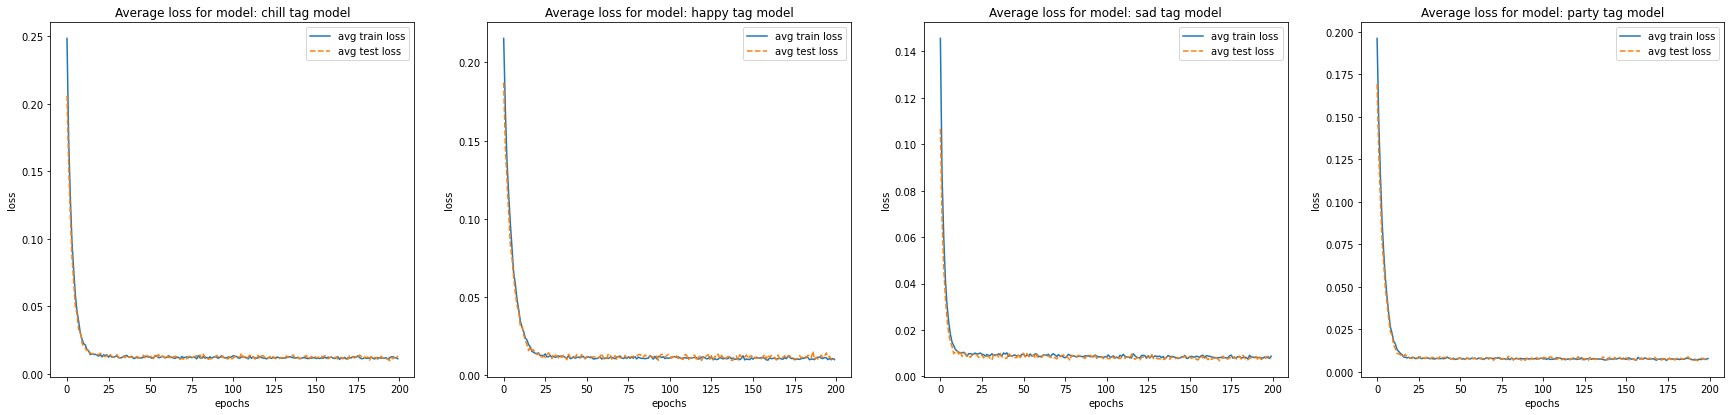

In [63]:
fig = plt.figure(figsize=(30, 30))

i = 0
for tag_name, properties in tag_stuff.items():
  train_losses = properties['NN'].train_losses 
  val_losses = properties['NN'].val_losses
  val_losses = [tensor.item() for tensor in val_losses]
  epochs = properties['NN'].epochs

  ax = fig.add_subplot(4, 4, i+1)
  ax.set_title('Average loss for model: ' + tag_name + ' tag model')
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  

  ax.plot(np.arange(epochs), train_losses, label = "avg train loss")
  ax.plot(np.arange(epochs), val_losses, label = "avg test loss", linestyle ="dashed")
  ax.legend()

  i += 1
  

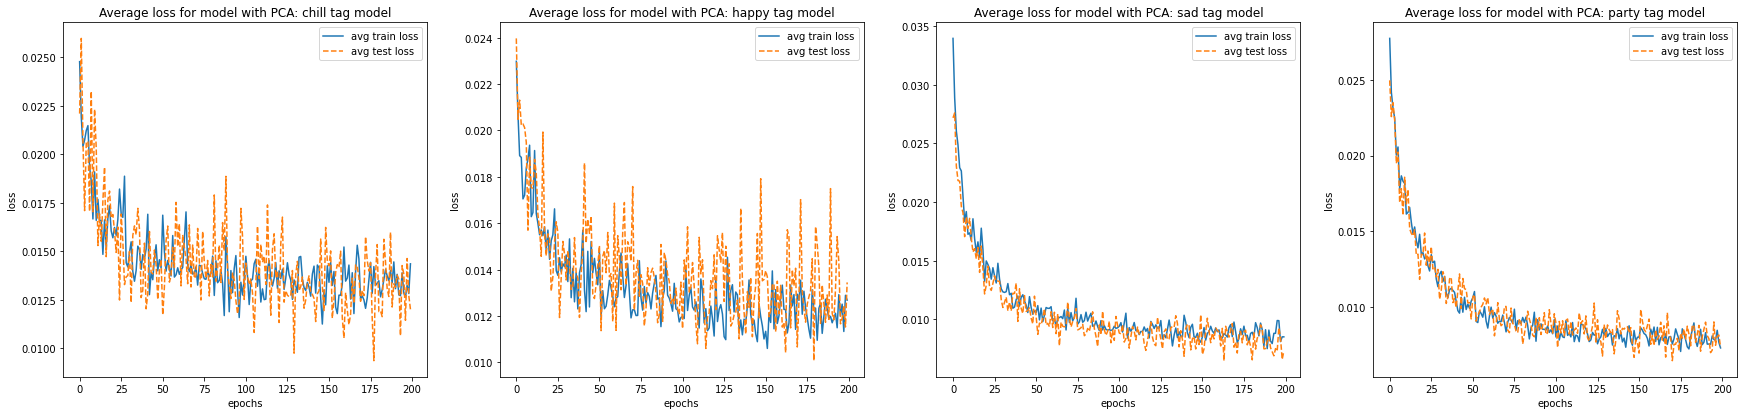

In [64]:
fig = plt.figure(figsize=(30, 30))

i = 0
for tag_name, properties in tag_stuff.items():
  train_losses = properties['NN_PCA'].train_losses 
  val_losses = properties['NN_PCA'].val_losses
  val_losses = [tensor.item() for tensor in val_losses]
  epochs = properties['NN_PCA'].epochs

  ax = fig.add_subplot(4, 4, i+1)
  ax.set_title('Average loss for model with PCA: ' + tag_name + ' tag model')
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  

  ax.plot(np.arange(epochs), train_losses, label = "avg train loss")
  ax.plot(np.arange(epochs), val_losses, label = "avg test loss", linestyle ="dashed")
  ax.legend()

  i += 1

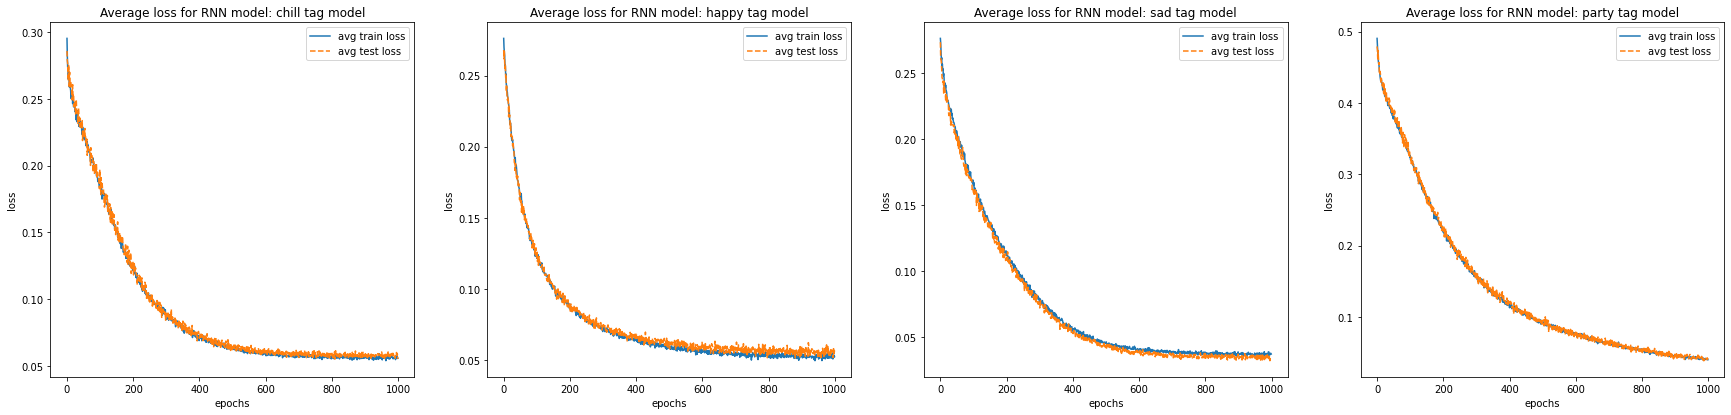

In [59]:
fig = plt.figure(figsize=(30, 30))

i = 0
for tag_name, properties in tag_stuff.items():
  train_losses = properties['RNN'].train_losses 
  val_losses = properties['RNN'].val_losses
  val_losses = [tensor.item() for tensor in val_losses]
  epochs = properties['RNN'].epochs

  ax = fig.add_subplot(4, 4, i+1)
  ax.set_title('Average loss for RNN model: ' + tag_name + ' tag model')
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  

  ax.plot(np.arange(epochs), train_losses, label = "avg train loss")
  ax.plot(np.arange(epochs), val_losses, label = "avg test loss", linestyle ="dashed")
  ax.legend()

  i += 1

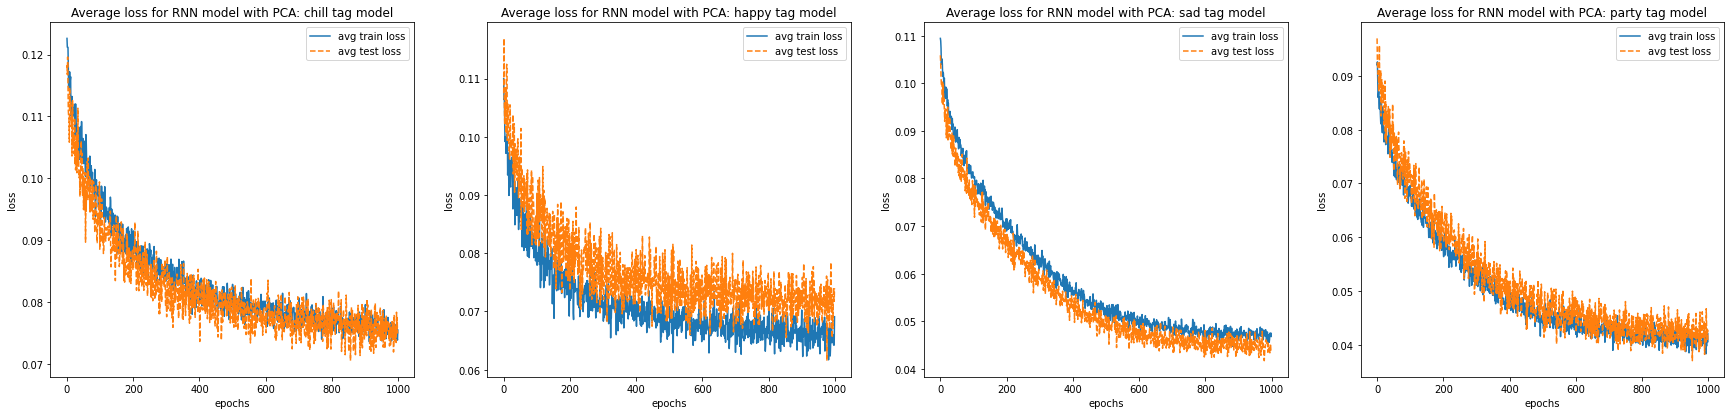

In [60]:
fig = plt.figure(figsize=(30, 30))

i = 0
for tag_name, properties in tag_stuff.items():
  train_losses = properties['RNN_PCA'].train_losses 
  val_losses = properties['RNN_PCA'].val_losses
  val_losses = [tensor.item() for tensor in val_losses]
  epochs = properties['RNN_PCA'].epochs

  ax = fig.add_subplot(4, 4, i+1)
  ax.set_title('Average loss for RNN model with PCA: ' + tag_name + ' tag model')
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  

  ax.plot(np.arange(epochs), train_losses, label = "avg train loss")
  ax.plot(np.arange(epochs), val_losses, label = "avg test loss", linestyle ="dashed")
  ax.legend()

  i += 1

# Saving the models

ALL SONGS

In [90]:

songs = pd.read_csv("songs.csv")
########################## NORMALISING
track_name = songs["track_name"].to_numpy(dtype = 'str')
artist = songs["artist"].to_numpy(dtype = 'str')
songs = songs.drop(columns = ["track_name", "artist"])

songs, _ , _ = normalize(songs)


songs["track_name"] = track_name
songs["artist"] = artist
########################## PCA
pca = PCA()
track_name = songs["track_name"].to_numpy(dtype = 'str')
artist = songs["artist"].to_numpy(dtype = 'str')

songs = songs.drop(columns = ["track_name", "artist"])
songs_np = songs.to_numpy(dtype = "float64")
pca.fit(songs)

songs_pca = pca.transform_rv(songs_np, 0.95)
print(songs_pca.shape)
songs_pca = pd.DataFrame(songs_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])


songs_pca["track_name"] = track_name
songs_pca["artist"] = artist

<ipython-input-11-7deacf3c2c32>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  max_df = pd.Series()
<ipython-input-11-7deacf3c2c32>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  min_df = pd.Series()


TESTING

In [232]:
test_chill = call_playlist("", '37i9dQZF1EVHGWrwldPRtj')
test_party = call_playlist("",'4oYSWmdhUMwEu0yAFA47lZ')
test_happy = call_playlist("",'37i9dQZF1EVJSvZp5AOML2')
test_sad = call_playlist("",'54NczufWOFmJ5jUVvRPxaF')

In [240]:
test_party = normalize(test_party)[0][:50]
test_sad = normalize(test_sad)[0][:50]
test_happy = normalize(test_happy)[0]
test_chill = normalize(test_chill)[0]


<ipython-input-11-7deacf3c2c32>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  max_df = pd.Series()
<ipython-input-11-7deacf3c2c32>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  min_df = pd.Series()


In [241]:
def test(test_data, model, modelname):
  loss_fn = nn.MSELoss()
  losses = []

  dataset = PlaylistData(test_data)
  iterator = DataLoader(dataset, batch_size = 10, shuffle = False)
  n = 0
  
  for batch in iterator:
    
    if batch.shape[0] == 10:
      n += 1
      input = batch[:4].to(device)
      actual = batch[4:].to(device)

      

      if modelname == 'NN':
        predicted = model(input).detach()

        predicted_repeated = predicted.reshape(1, predicted.shape[0]).repeat(6,1)
        loss = torch.sqrt(loss_fn(predicted_repeated, actual))
        losses.append(loss.item())
      
      elif modelname == 'RNN':
        predicted = model(input.T).detach()
        loss = torch.sqrt(loss_fn(predicted, actual))
        losses.append(loss.item())
  
  return n, np.array(losses)



      


AVERAGE MSE LOSS FOR NN ON  party TAG IS 0.20779578387737274
AVERAGE MSE LOSS FOR RNN ON  party TAG IS 0.22496057152748108
AVERAGE MSE LOSS FOR NN ON  sad TAG IS 0.21919416785240173
AVERAGE MSE LOSS FOR RNN ON  sad TAG IS 0.21463715732097627
AVERAGE MSE LOSS FOR NN ON  happy TAG IS 0.2412413090467453
AVERAGE MSE LOSS FOR RNN ON  happy TAG IS 0.2373483806848526
AVERAGE MSE LOSS FOR NN ON  chill TAG IS 0.2575704872608185
AVERAGE MSE LOSS FOR RNN ON  chill TAG IS 0.25996858179569243


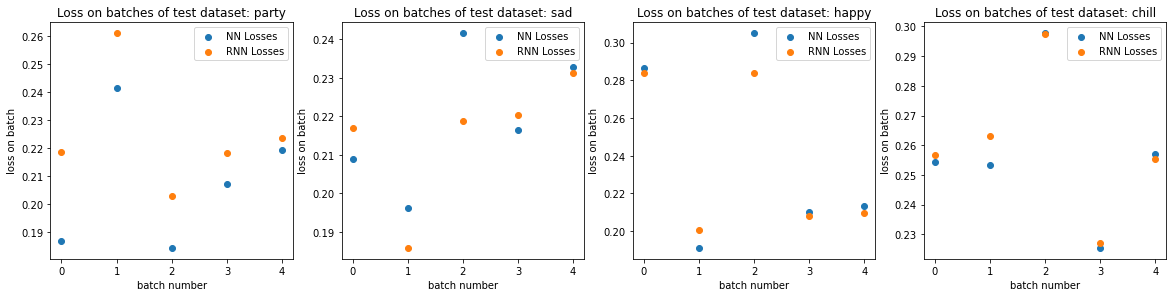

In [249]:
figure = fig = plt.figure(figsize=(20, 20))

i = 0 
for tag, test_set in zip(["party", "sad", "happy", "chill"] ,[test_party, test_sad, test_happy, test_chill]):
  
  NN_model = tag_stuff[tag]["NN"].model

  num_batches_nn, losses_NN = test(test_set, NN_model, "NN")
  print("AVERAGE MSE LOSS FOR NN ON ", tag, "TAG IS",losses_NN.mean() )

  RNN_model = tag_stuff[tag]["RNN"].model
  num_batches_rnn, losses_RNN = test(test_set, RNN_model, "RNN")
  print("AVERAGE MSE LOSS FOR RNN ON ", tag, "TAG IS", losses_RNN.mean())
  
  
  
  ax = fig.add_subplot(4,4, i+1)

  ax.set_title('Loss on batches of test dataset: '+ tag)
  ax.set_xlabel("batch number")
  ax.set_ylabel("loss on batch")
  ax.scatter(np.arange(num_batches_nn), losses_NN, label = "NN Losses")
  ax.scatter(np.arange(num_batches_nn), losses_RNN, label = "RNN Losses")
  ax.legend()
  i+= 1


#Finding Closest Songs


In [ ]:
#Euclidean Distance formula


In [ ]:
def Euclidean_Distance(playlist, input):
  #print(playlist.head(), type(playlist))
  #print(input.head(), type(input))
  return np.sqrt(np.sum((playlist - input) ** 2, axis = 1))

In [ ]:
#Calling the call_playlist method. Creates the same dataset as before, but also includes track names and artist names
def call_playlist_with_names(creator, playlist_id):
    playlist_df = pd.DataFrame(columns = features)
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    
    for track in playlist:
        track_features = {}
        track_id = track["track"]["id"]
        
        audio_features = sp.audio_features(track_id)[0]
        track_features["track_name"] = track["track"]["name"]
        track_features["artist"] = track["track"]["album"]["artists"][0]["name"]

        #audio_analysis = sp.audio_analysis(track_id)['track']

        for feature in audio_features_list:
          track_features[feature] = audio_features[feature]
        #for feature in audio_analysis_list:  track_features[feature] = audio_analysis[feature]
        
        track_df = pd.DataFrame(track_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
    
    return playlist_df

In [ ]:
device

device(type='cuda')

In [ ]:

happy1_with_names = call_playlist_with_names(creator = "", playlist_id = '37i9dQZF1DXdPec7aLTmlC') #happy hits - spotify
happy2_with_names = call_playlist_with_names(creator = "", playlist_id = '37i9dQZF1DWZKuerrwoAGz') #happy favorites - spotify
happy3_with_names = call_playlist_with_names(creator = "", playlist_id = '37i9dQZF1DWSf2RDTDayIx') #happy beats - spotify
happy4_with_names = call_playlist_with_names(creator = "", playlist_id = '37i9dQZF1DXcNb6Ba0LuVc') #feel good beats - spotify
happy5_with_names = call_playlist_with_names(creator = "", playlist_id = '37i9dQZF1DWVlYsZJXqdym') 
happy6_with_names = call_playlist_with_names("Morning Motivation", "37i9dQZF1DXc5e2bJhV6pu")
happy7_with_names = call_playlist_with_names("","37i9dQZF1DX0E9XMGembJo")
happy8_with_names = call_playlist_with_names("", "37i9dQZF1DX2sUQwD7tbmL")
happy9_with_names = call_playlist_with_names("", "37i9dQZF1DX5YTAi6JhwZm")
happy10_with_names = call_playlist_with_names("","37i9dQZF1DX0tnKPLNG9Ld")


happy_playlist_data_with_names = pd.concat([happy1_with_names, happy2_with_names, happy3_with_names, happy4_with_names, happy5_with_names, happy6_with_names, happy7_with_names, happy8_with_names, happy9_with_names, happy10_with_names])


In [ ]:
sad1_with_names = call_playlist_with_names("sadhour", '37i9dQZF1DWSqBruwoIXkA')
sad2_with_names = call_playlist_with_names("sadsongs", '37i9dQZF1DX7qK8ma5wgG1')
sad3_with_names = call_playlist_with_names("sadbops", '37i9dQZF1DWZUAeYvs88zc')
sad4_with_names = call_playlist_with_names("sadbeats", '37i9dQZF1DWVrtsSlLKzro')
sad5_with_names = call_playlist_with_names("", "37i9dQZF1DWYfVqUciU2jI")
sad6_with_names = call_playlist_with_names("", "7xySbQAypJdiEBRRlycJIY")
sad_playlist_data_with_names = pd.concat([sad1_with_names,sad2_with_names,sad3_with_names,sad4_with_names,sad5_with_names, sad6_with_names])


In [ ]:
party1_with_names = call_playlist_with_names("", '37i9dQZF1DWY4xHQp97fN6')
party2_with_names = call_playlist_with_names("", '37i9dQZF1DX6GwdWRQMQpq')
party3_with_names = call_playlist_with_names("", '37i9dQZF1DX66m4icL86Ru')
party4_with_names = call_playlist_with_names("", '37i9dQZF1DXa2PvUpywmrr')
party5_with_names = call_playlist_with_names("", '37i9dQZF1DX0MXH7aN4Pxn')
party6_with_names = call_playlist_with_names("Dance Party", "37i9dQZF1DXaXB8fQg7xif")
party7_with_names = call_playlist_with_names("Choice Edit", "37i9dQZF1DX1aTyQ3Z9nTc")
party8_with_names = call_playlist_with_names("Floorfillers", "37i9dQZF1DWWXrKtH3fzUd")
party9_with_names = call_playlist_with_names("Limo Ride", "37i9dQZF1DX5AX8gioxrnN")
party10_with_names = call_playlist_with_names("Warehouse Party", "37i9dQZF1DX5hHfOi73rY3")
party11_with_names = call_playlist_with_names("", "37i9dQZF1DX7e8TjkFNKWH")
party12_with_names = call_playlist_with_names("", "37i9dQZF1DX4nkDUiMktkK")
party13_with_names = call_playlist_with_names("", "37i9dQZF1DXbX3zSzB4MO0")
party_playlist_data_with_names = pd.concat([party1_with_names, party2_with_names, party3_with_names, party4_with_names, party5_with_names, party6_with_names, party7_with_names, party8_with_names, party9_with_names, party10_with_names, party11_with_names, party12_with_names, party13_with_names])

In [ ]:
chill1_with_names = call_playlist_with_names(creator = "",playlist_id = '6IKQrtMc4c00YzONcUt7QH')
chill2_with_names = call_playlist_with_names(creator = "", playlist_id='37i9dQZF1DX6VdMW310YC7')
chill3_with_names = call_playlist_with_names(creator = "", playlist_id ='37i9dQZF1DXdLK5wjKyhVm')
chill4_with_names = call_playlist_with_names(creator = "", playlist_id ='37i9dQZF1DX2UgsUIg75Vg')
#chill5_with_names = call_playlist_with_names(creator = "Boistrous Pop", playlist_id = '6QAVsGp118XZLQrBe38r5O')
chill6_with_names = call_playlist_with_names(creator = "Lowkey", playlist_id = "37i9dQZF1DX2yvmlOdMYzV")
chill7_with_names = call_playlist_with_names(creator = "Unplugged", playlist_id = "37i9dQZF1DWWxrt1tiKYiX")
chill8_with_names = call_playlist_with_names(creator = "Stay in Bed", playlist_id = "37i9dQZF1DX6tTW0xDxScH")
chill9_with_names = call_playlist_with_names(creator = "Just Chill", playlist_id = "37i9dQZF1DX889U0CL85jj")
chill10_with_names = call_playlist_with_names(creator = "Sunset Chill", playlist_id = "37i9dQZF1DWVtzubo4lvxd")

chill_playlist_data_with_names = pd.concat([chill1_with_names, chill2_with_names, chill3_with_names, chill4_with_names, chill6_with_names, chill7_with_names, chill8_with_names, chill9_with_names, chill10_with_names])


In [ ]:
all_songs_with_names = pd.concat([happy_playlist_data_with_names, sad_playlist_data_with_names, party_playlist_data_with_names, chill_playlist_data_with_names])
all_songs_with_names.to_csv("songs.csv", encoding='utf-8', index=False)

In [ ]:
all_songs_with_names = pd.concat([happy_playlist_data_with_names, sad_playlist_data_with_names, party_playlist_data_with_names, chill_playlist_data_with_names])
pca = PCA()
track_name = all_songs_with_names["track_name"].to_numpy(dtype = 'str')
artist = all_songs_with_names["artist"].to_numpy(dtype = 'str')
#print(track_name)
songs = all_songs_with_names.drop(columns = ["track_name", "artist"])
songs = songs.to_numpy(dtype = "float64")
pca.fit(songs)
songs_pca = pca.transform_rv(songs, .99997)
print(songs_pca.shape)
all_songs_with_names = pd.DataFrame(songs_pca, columns = ["PC1", "PC2", "PC3", "PC4","PC5", "PC6"])


all_songs_with_names["track_name"] = track_name
all_songs_with_names["artist"] = artist
all_songs_with_names.head()

(3352, 6)


,PC1,PC2,PC3,PC4,PC5,PC6,track_name,artist
0,-8.119266,-3.974499,-0.007580,0.067942,-0.294707,0.157628,I'm Good (Blue),David Guetta
1,-20.042074,-1.567478,0.126044,-0.258815,0.170534,0.079702,I Ain't Worried,OneRepublic
2,-25.059277,-3.832461,-0.157133,0.023533,0.444864,-0.184291,Made You Look,Meghan Trainor
3,-51.050113,-1.134181,-0.017421,-0.023304,-0.280731,0.096329,Blinding Lights,The Weeknd
4,24.535138,-3.869649,-0.032221,-0.023524,-0.043464,0.171620,Watermelon Sugar,Harry Styles


In [ ]:
all_songs_with_names.head()

,danceability,energy,loudness,speechiness,instrumentalness,valence,tempo,acousticness,track_name,artist
0,0.561,0.965,-3.673,0.0343,0.000007,0.304,128.040,0.00383,I'm Good (Blue),David Guetta
1,0.704,0.797,-5.927,0.0475,0.000745,0.825,139.994,0.08260,I Ain't Worried,OneRepublic
2,0.838,0.525,-3.562,0.0665,0.000002,0.884,144.981,0.34500,Made You Look,Meghan Trainor
3,0.514,0.730,-5.934,0.0598,0.000095,0.334,171.005,0.00146,Blinding Lights,The Weeknd
4,0.548,0.816,-4.209,0.0465,0.0,0.557,95.390,0.12200,Watermelon Sugar,Harry Styles


In [ ]:
all_songs_with_names = normalize(all_songs_with_names)[0]
sad_playlist_data_with_names = normalize(sad_playlist_data_with_names)[0]


<ipython-input-124-32f233a96e5a>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  max_df = pd.Series()
<ipython-input-124-32f233a96e5a>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  min_df = pd.Series()


In [ ]:
def find_closest_songs(dataset_with_names, model_output, num_input_songs, num_output_songs):
  dataset = dataset_with_names.drop(columns = ["track_name", "artist"])
  distances = Euclidean_Distance(dataset, model_output)
  dataset_with_distances = dataset_with_names
  dataset_with_distances["distances"] = distances

  closest_songs = dataset_with_distances.nsmallest(10, 'distances')
  tracks = closest_songs[["track_name", "artist"]]
  print("OUTPUT SONGS")
  display(tracks.drop_duplicates())

In [ ]:
# testing on a set of input songs
model = tag_stuff['sad']['RNN_PCA']


#print("DENORMALISED INPUT")
input = torch.tensor(party_playlist_data[ : 4].to_numpy(dtype = 'float64').T)
#input_denorm = denormalize(chill_playlist_data[ : 4], party_max, part_min)
#display(input_denorm)
input_names = party_playlist_data_with_names[: 4]
print("")
print("INPUT SONGS")
display(input_names[["track_name", "artist"]])


#print("DENORMALISED OUTPUT")
output = pd.DataFrame(data = model.model(input.float()).detach().numpy(), columns = cols)
output = output.squeeze()
#output_denorm = denormalize(output.T, party_max, part_min)
#display(output_denorm)
#print("OUPTUT")
#print(output)
#print(type(output))
#print("EXPECTED OUTPUT")
# output_exp = denormalize(party_playlist_data[4 : 10], party_max, part_min)
# display(output_exp)

#print("OUTPUT DENORM")
#print(output_denorm)
song_1 = output.iloc[0]
#print(type(song_1))
#print("SONG 1")
#print(song_1)

find_closest_songs(sad_playlist_data_with_names, song_1, 5, 6)




INPUT SONGS


,track_name,artist
0,Niagara Falls (Foot or 2) [with Travis Scott &...,Metro Boomin
1,FTCU (feat. GloRilla & Gangsta Boo),Latto
2,Rich Flex,Drake
3,Just Wanna Rock,Lil Uzi Vert


OUTPUT SONGS


,track_name,artist
98,FIGURES,Jessie Reyez
86,I Would've,Jessie Murph
59,How Could You,Jessie Murph
36,Love Is Gone - Acoustic,SLANDER
75,Meant To Be,Ber
34,Dancing On My Own,Calum Scott
50,This Is Home,Cavetown


In [ ]:
party13